In [111]:
import os
import sys
import numpy as np
import datetime
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import library as mio
from sklearn.metrics import classification_report

In [112]:
%matplotlib inline

In [113]:
# reduced list only the most correlated
indices_list_Complete = ["^GSPC","SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB", "EUR","AUD","GBP","JPY", "SILVER", "GOLD", "WT1010"] # reduced list only the most correlated

In [114]:
start_date = "2003-01-01" # Start day of Series
end_date = "2017-01-01"	  # Final day of series
dates = pd.date_range(start_date, end_date)  # date range as index

In [115]:
df_index = mio.get_data(indices_list_Complete, dates)

In [116]:
df_index.fillna(method='bfill', inplace=True)
df_index.tail()

,^GSPC,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
2016-12-23,2263.790039,224.732324,5462.689941,19933.810547,11449.929688,7068.200195,4839.680176,19403.060547,21574.759766,5627.899902,51.74,0.957179,1.394655,0.814821,117.185667,15.74,1131.00,0.25
2016-12-27,2268.879883,225.289896,5487.439941,19945.039062,11472.240234,7106.100098,4848.279785,19403.060547,21754.740234,5685.000000,52.25,0.956361,1.391288,0.815262,117.457200,15.85,1139.75,0.21
2016-12-28,2249.919922,223.427985,5438.560059,19833.679688,11474.990234,7106.100098,4848.009766,19401.720703,21754.740234,5685.000000,53.39,0.963017,1.393879,0.817868,117.543337,15.85,1139.75,0.19
2016-12-29,2249.260010,223.378214,5432.089844,19819.779297,11451.049805,7120.299805,4838.470215,19145.140625,21790.910156,5699.100098,53.46,0.954902,1.387659,0.817942,116.505533,16.06,1146.80,0.17
2016-12-30,2238.830078,222.561759,5383.120117,19762.599609,11481.059570,7142.799805,4862.310059,19114.369141,22000.560547,5665.799805,53.30,0.948191,1.385629,0.810056,116.637500,16.24,1159.10,0.19


In [117]:
df_index.describe()

,^GSPC,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1412.595838,124.247170,2887.485241,12676.749688,6792.847443,5650.849134,4130.124744,12944.451194,19392.780442,4716.324737,70.492837,0.784911,1.218466,0.605921,103.269039,16.829385,993.989504,2.667827
std,377.738299,42.716304,1111.738679,3019.752104,2287.728860,879.576705,772.017335,3478.880031,4632.425945,855.962899,29.223703,0.073974,0.180926,0.066218,13.772426,8.778454,427.903735,1.383519
min,676.530029,57.440272,1268.640015,6547.049805,2202.959961,3287.000000,2403.040039,7054.979980,8409.009766,2700.399902,22.480000,0.625360,0.906698,0.474330,75.751979,4.370000,319.750000,-0.200000
25%,1139.810059,93.528227,2094.139893,10444.370117,4998.160156,5053.200195,3580.479980,9844.589844,15413.429688,4169.500000,45.250000,0.734626,1.071435,0.550249,92.727524,10.770000,611.250000,1.520000
50%,1313.010010,112.113904,2480.330078,12105.549805,6534.970215,5808.799805,4038.699951,11944.299805,20672.390625,4807.399902,66.340000,0.772966,1.237935,0.616478,105.553327,15.860000,1081.100000,3.150000
75%,1650.469971,152.589273,3496.429932,15112.190430,8260.480469,6364.700195,4582.830078,16024.849609,22835.820312,5342.399902,101.890000,0.829636,1.341054,0.643910,115.820209,20.020000,1308.250000,3.910000
max,2271.719971,225.444643,5487.439941,19974.619141,12374.730469,7142.799805,6168.149902,20868.029297,31638.220703,6828.700195,140.730000,0.963904,1.776110,0.822470,125.630900,48.700000,1891.000000,4.690000


In [118]:
import myltsm as ltsm

In [34]:
diff_values=pd.DataFrame()
for t in indices_list_Complete:
    diff_values[t] = ltsm.difference(df_index[t].values, 1)

In [37]:
diff_values.describe()

,^GSPC,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000
mean,0.377355,0.043691,1.134583,3.165460,2.376850,0.889132,0.473124,2.951487,3.585426,0.748638,0.006598,-0.000004,-0.000111,5.224858e-05,-0.000842,0.003263,0.231810,-0.001144
std,14.714290,1.287708,33.936318,125.334113,92.736873,61.096317,54.774266,195.152334,287.877963,50.423728,1.093099,0.004657,0.010250,3.645091e-03,0.581142,0.487125,12.864238,0.045934
min,-106.849976,-8.223334,-202.060059,-777.679688,-699.870117,-391.099610,-368.770020,-1720.140625,-3444.238282,-560.500000,-8.400000,-0.029391,-0.077819,-2.233300e-02,-3.512111,-6.680000,-133.500000,-0.260000
25%,-6.239990,-0.512002,-15.062561,-52.393066,-39.349854,-28.899902,-27.219971,-81.107910,-108.000488,-22.100098,-0.560000,-0.002556,-0.005244,-1.852250e-03,-0.303033,-0.140000,-5.000000,-0.030000
50%,0.950012,0.084206,2.565185,6.150391,5.384888,1.700196,1.434937,0.000000,0.000000,1.600098,0.030000,-0.000093,-0.000500,-1.000000e-06,0.002914,0.000000,0.250000,0.000000
75%,7.699982,0.666775,19.082642,65.329590,47.277465,32.500000,30.105102,101.142578,131.565430,26.699829,0.612500,0.002550,0.004511,1.826500e-03,0.327468,0.170000,5.900000,0.020000
max,104.130005,10.749727,194.739990,936.419922,518.140136,431.299805,367.010010,1883.589843,2332.539063,279.899903,7.340000,0.023450,0.124285,5.573000e-02,2.900577,5.340000,80.750000,0.240000


In [119]:
supervised_values = df_index.values
supervised_values = supervised_values.astype('float32')

In [120]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
scaled = scaler.fit_transform(supervised_values)

In [122]:
scaled

array([[-1.33329713, -1.30300069, -1.3518002 , ..., -1.37736118,
        -1.52343142,  1.12206113],
       [-1.33446217, -1.29806268, -1.34979415, ..., -1.37223423,
        -1.51922429,  1.18712199],
       [-1.28039587, -1.26966941, -1.31899118, ..., -1.35799277,
        -1.49094296,  1.21603775],
       ..., 
       [ 2.21699214,  2.3221786 ,  2.29499674, ..., -0.11158279,
         0.34068686, -1.79121351],
       [ 2.21524477,  2.32101345,  2.28917599, ..., -0.08765729,
         0.35716498, -1.80567145],
       [ 2.18762946,  2.30189705,  2.24512196, ..., -0.06714959,
         0.38591367, -1.79121351]], dtype=float32)

In [123]:
reframed = ltsm.series_to_supervised(scaled, 1, 1)

In [124]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var1(t)', 'var2(t)',
       'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)',
       'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)', 'var14(t)',
       'var15(t)', 'var16(t)', 'var17(t)', 'var18(t)'],
      dtype='object')

In [125]:
reframed.tail()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t)
3520,2.246223,2.345025,2.302967,2.398594,2.038665,1.606514,0.912680,1.863858,0.484354,1.083816,...,0.471090,1.065121,-0.641791,2.329098,0.973954,3.155198,1.010614,-0.124115,0.320235,-1.747840
3521,2.253716,2.352718,2.316705,2.403538,2.035968,1.611631,0.919223,1.856783,0.471090,1.065121,...,0.509947,1.131839,-0.624336,2.318039,0.955342,3.161859,1.030332,-0.111583,0.340687,-1.776756
3522,2.267193,2.365773,2.338970,2.407257,2.045722,1.654725,0.930363,1.856783,0.509947,1.131839,...,0.509947,1.131839,-0.585322,2.408029,0.969665,3.201219,1.036587,-0.111583,0.340687,-1.791214
3523,2.216992,2.322179,2.294997,2.370375,2.046924,1.654725,0.930014,1.856398,0.509947,1.131839,...,0.517757,1.148314,-0.582926,2.298313,0.935281,3.202338,0.961223,-0.087657,0.357165,-1.805671
3524,2.215245,2.321013,2.289176,2.365771,2.036458,1.670872,0.917655,1.782634,0.517757,1.148314,...,0.563020,1.109405,-0.588402,2.207578,0.924060,3.083227,0.970806,-0.067150,0.385914,-1.791214


In [126]:
reframed.drop(reframed.columns[[19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]], axis=1, inplace=True)

In [127]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var1(t)'],
      dtype='object')

In [128]:
values = reframed.values
train_size = int(len(values) * 0.75)
train, test = values[0:train_size], values[train_size:len(values)]
print('Observations: %d' % (len(values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3524
Training Observations: 2643
Testing Observations: 881


In [129]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2643, 1, 18) (2643,) (881, 1, 18) (881,)


In [130]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [131]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])

In [132]:
history = model.fit(train_X, train_y, epochs=250, batch_size=252, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 2643 samples, validate on 881 samples
Epoch 1/250
0s - loss: 0.4523 - mean_squared_error: 0.4523 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 257.8170 - cosine_proximity: -3.4014e-01 - val_loss: 1.8499 - val_mean_squared_error: 1.8499 - val_mean_absolute_error: 1.3084 - val_mean_absolute_percentage_error: 85.3384 - val_cosine_proximity: -1.0000e+00
Epoch 2/250
0s - loss: 0.2298 - mean_squared_error: 0.2298 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 199.9183 - cosine_proximity: -5.4597e-01 - val_loss: 1.5343 - val_mean_squared_error: 1.5343 - val_mean_absolute_error: 1.1875 - val_mean_absolute_percentage_error: 77.1148 - val_cosine_proximity: -1.0000e+00
Epoch 3/250
0s - loss: 0.1161 - mean_squared_error: 0.1161 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 137.3526 - cosine_proximity: -7.2153e-01 - val_loss: 1.3101 - val_mean_squared_error: 1.3101 - val_mean_absolute_error: 1.0946 - val_mean_absolute_percentage_error: 7

0s - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 39.7130 - cosine_proximity: -9.5535e-01 - val_loss: 0.6294 - val_mean_squared_error: 0.6294 - val_mean_absolute_error: 0.7348 - val_mean_absolute_percentage_error: 45.9865 - val_cosine_proximity: -1.0000e+00
Epoch 27/250
0s - loss: 0.0038 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 39.7209 - cosine_proximity: -9.5535e-01 - val_loss: 0.6241 - val_mean_squared_error: 0.6241 - val_mean_absolute_error: 0.7314 - val_mean_absolute_percentage_error: 45.7513 - val_cosine_proximity: -1.0000e+00
Epoch 28/250
0s - loss: 0.0037 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 39.6907 - cosine_proximity: -9.5535e-01 - val_loss: 0.6190 - val_mean_squared_error: 0.6190 - val_mean_absolute_error: 0.7280 - val_mean_absolute_percentage_error: 45.5251 - val_cosine_proximity: -1.0000e+00
Epoch 29/250
0s -

0s - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 37.8464 - cosine_proximity: -9.5762e-01 - val_loss: 0.5304 - val_mean_squared_error: 0.5304 - val_mean_absolute_error: 0.6690 - val_mean_absolute_percentage_error: 41.5517 - val_cosine_proximity: -1.0000e+00
Epoch 52/250
0s - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 37.7584 - cosine_proximity: -9.5762e-01 - val_loss: 0.5275 - val_mean_squared_error: 0.5275 - val_mean_absolute_error: 0.6670 - val_mean_absolute_percentage_error: 41.4184 - val_cosine_proximity: -1.0000e+00
Epoch 53/250
0s - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 37.6694 - cosine_proximity: -9.5687e-01 - val_loss: 0.5247 - val_mean_squared_error: 0.5247 - val_mean_absolute_error: 0.6651 - val_mean_absolute_percentage_error: 41.2873 - val_cosine_proximity: -1.0000e+00
Epoch 54/250
0s -

0s - loss: 0.0021 - mean_squared_error: 0.0021 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 35.9346 - cosine_proximity: -9.5838e-01 - val_loss: 0.4723 - val_mean_squared_error: 0.4723 - val_mean_absolute_error: 0.6273 - val_mean_absolute_percentage_error: 38.7098 - val_cosine_proximity: -1.0000e+00
Epoch 77/250
0s - loss: 0.0021 - mean_squared_error: 0.0021 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 35.8753 - cosine_proximity: -9.5838e-01 - val_loss: 0.4704 - val_mean_squared_error: 0.4704 - val_mean_absolute_error: 0.6259 - val_mean_absolute_percentage_error: 38.6122 - val_cosine_proximity: -1.0000e+00
Epoch 78/250
0s - loss: 0.0021 - mean_squared_error: 0.0021 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 35.8223 - cosine_proximity: -9.5914e-01 - val_loss: 0.4685 - val_mean_squared_error: 0.4685 - val_mean_absolute_error: 0.6245 - val_mean_absolute_percentage_error: 38.5155 - val_cosine_proximity: -1.0000e+00
Epoch 79/250
0s -

0s - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 34.9123 - cosine_proximity: -9.6065e-01 - val_loss: 0.4306 - val_mean_squared_error: 0.4306 - val_mean_absolute_error: 0.5953 - val_mean_absolute_percentage_error: 36.5113 - val_cosine_proximity: -1.0000e+00
Epoch 102/250
0s - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 34.8753 - cosine_proximity: -9.6065e-01 - val_loss: 0.4291 - val_mean_squared_error: 0.4291 - val_mean_absolute_error: 0.5941 - val_mean_absolute_percentage_error: 36.4323 - val_cosine_proximity: -1.0000e+00
Epoch 103/250
0s - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 34.8381 - cosine_proximity: -9.6065e-01 - val_loss: 0.4276 - val_mean_squared_error: 0.4276 - val_mean_absolute_error: 0.5930 - val_mean_absolute_percentage_error: 36.3538 - val_cosine_proximity: -1.0000e+00
Epoch 104/250
0

0s - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 33.9751 - cosine_proximity: -9.6216e-01 - val_loss: 0.3968 - val_mean_squared_error: 0.3968 - val_mean_absolute_error: 0.5684 - val_mean_absolute_percentage_error: 34.6862 - val_cosine_proximity: -1.0000e+00
Epoch 127/250
0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 33.9408 - cosine_proximity: -9.6292e-01 - val_loss: 0.3956 - val_mean_squared_error: 0.3956 - val_mean_absolute_error: 0.5674 - val_mean_absolute_percentage_error: 34.6191 - val_cosine_proximity: -1.0000e+00
Epoch 128/250
0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 33.9067 - cosine_proximity: -9.6292e-01 - val_loss: 0.3944 - val_mean_squared_error: 0.3944 - val_mean_absolute_error: 0.5664 - val_mean_absolute_percentage_error: 34.5524 - val_cosine_proximity: -1.0000e+00
Epoch 129/250
0

0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 32.9747 - cosine_proximity: -9.6368e-01 - val_loss: 0.3682 - val_mean_squared_error: 0.3682 - val_mean_absolute_error: 0.5452 - val_mean_absolute_percentage_error: 33.1331 - val_cosine_proximity: -1.0000e+00
Epoch 152/250
0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 32.9438 - cosine_proximity: -9.6368e-01 - val_loss: 0.3672 - val_mean_squared_error: 0.3672 - val_mean_absolute_error: 0.5443 - val_mean_absolute_percentage_error: 33.0746 - val_cosine_proximity: -1.0000e+00
Epoch 153/250
0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 32.8725 - cosine_proximity: -9.6368e-01 - val_loss: 0.3661 - val_mean_squared_error: 0.3661 - val_mean_absolute_error: 0.5435 - val_mean_absolute_percentage_error: 33.0204 - val_cosine_proximity: -1.0000e+00
Epoch 154/250
0

0s - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 34.5792 - cosine_proximity: -9.5838e-01 - val_loss: 0.3048 - val_mean_squared_error: 0.3048 - val_mean_absolute_error: 0.4920 - val_mean_absolute_percentage_error: 29.7012 - val_cosine_proximity: -1.0000e+00
Epoch 178/250
0s - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 29.8486 - cosine_proximity: -9.6746e-01 - val_loss: 0.3150 - val_mean_squared_error: 0.3150 - val_mean_absolute_error: 0.5031 - val_mean_absolute_percentage_error: 30.5353 - val_cosine_proximity: -1.0000e+00
Epoch 179/250
0s - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 31.0776 - cosine_proximity: -9.6292e-01 - val_loss: 0.3129 - val_mean_squared_error: 0.3129 - val_mean_absolute_error: 0.5003 - val_mean_absolute_percentage_error: 30.2933 - val_cosine_proximity: -1.0000e+00
Epoch 180/250
0

0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 30.8005 - cosine_proximity: -9.6595e-01 - val_loss: 0.3167 - val_mean_squared_error: 0.3167 - val_mean_absolute_error: 0.5025 - val_mean_absolute_percentage_error: 30.3946 - val_cosine_proximity: -1.0000e+00
Epoch 203/250
0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 30.7916 - cosine_proximity: -9.6595e-01 - val_loss: 0.3166 - val_mean_squared_error: 0.3166 - val_mean_absolute_error: 0.5024 - val_mean_absolute_percentage_error: 30.3857 - val_cosine_proximity: -1.0000e+00
Epoch 204/250
0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 30.7812 - cosine_proximity: -9.6595e-01 - val_loss: 0.3165 - val_mean_squared_error: 0.3165 - val_mean_absolute_error: 0.5023 - val_mean_absolute_percentage_error: 30.3760 - val_cosine_proximity: -1.0000e+00
Epoch 205/250
0

0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 30.2137 - cosine_proximity: -9.6595e-01 - val_loss: 0.3114 - val_mean_squared_error: 0.3114 - val_mean_absolute_error: 0.4973 - val_mean_absolute_percentage_error: 30.0254 - val_cosine_proximity: -1.0000e+00
Epoch 228/250
0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 30.1778 - cosine_proximity: -9.6595e-01 - val_loss: 0.3111 - val_mean_squared_error: 0.3111 - val_mean_absolute_error: 0.4970 - val_mean_absolute_percentage_error: 30.0065 - val_cosine_proximity: -1.0000e+00
Epoch 229/250
0s - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 30.1413 - cosine_proximity: -9.6595e-01 - val_loss: 0.3108 - val_mean_squared_error: 0.3108 - val_mean_absolute_error: 0.4967 - val_mean_absolute_percentage_error: 29.9874 - val_cosine_proximity: -1.0000e+00
Epoch 230/250
0

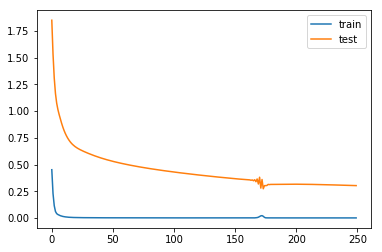

In [133]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show() 

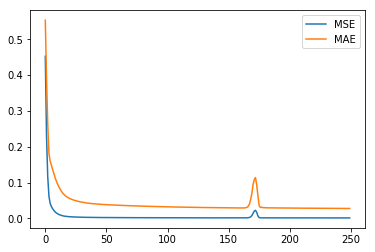

In [134]:
# plot metrics
pyplot.plot(history.history['mean_squared_error'], label='MSE')
pyplot.plot(history.history['mean_absolute_error'],label='MAE')
#pyplot.plot(history.history['mean_absolute_percentage_error'], label='MAPE')
#pyplot.plot(history.history['cosine_proximity'],label='CP')
pyplot.legend()
pyplot.show()

In [135]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [136]:
from numpy import concatenate
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [137]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Test RMSE: 208.120


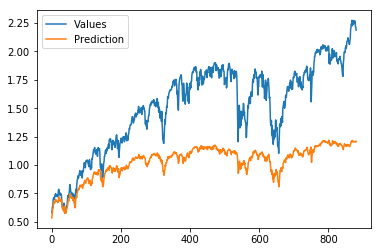

In [138]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test_y, label='Values')
pyplot.plot(yhat, label='Prediction')
pyplot.legend()
pyplot.show()